In [3]:
import numpy as np
import matplotlib.pyplot as plt

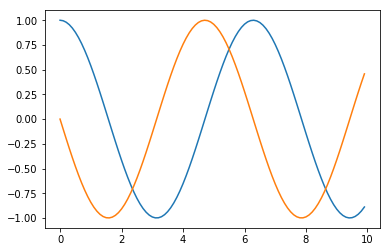

In [5]:
a = 0
b = 10.0
N =100
h = (b-a)/N

tpoints = np.arange(a,b,h)
xpoints = []
upoints = []


def F(x, u):
    k = 1.0
    m = 1.0
    return -(k/m)*x

x = 1.0
u = 0
for t in tpoints:
    xpoints.append(x)
    upoints.append(u)

    l1 = h*u
    k1 = h*F(x, u)  

    l2 = h*(u + 0.5*k1)
    k2 = h*F(x + 0.5*l1, u + 0.5*k1)

    l3 = h*(u + 0.5*k2)
    k3 = h*F(x + 0.5*l2, u + 0.5*k2)

    l4 = h*(u + k3)
    k4 = h*F(x + l3, u + k3)

    x += (l1 + 2*l2 + 2*l3 + l4)/6
    u += (k1 + 2*k2 + 2*k3 + k4)/6

plt.plot(tpoints, xpoints)
plt.plot(tpoints, upoints)

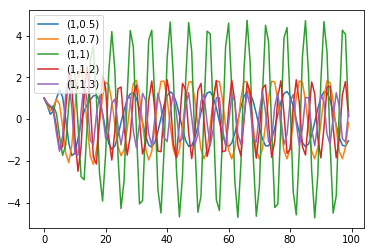

In [44]:
def F(x, u, t, omega_0=1, omega=0.5):
    gamma=0.1
    return - omega_0**2 *x - 2* gamma *u + np.sin(omega*t)


def fo(plt, omega_0=1, omega=0.5):
    a = 0
    b = 100.0
    N =100
    h = (b-a)/N

    tpoints = np.arange(a,b,h)
    xpoints = []
    upoints = []

    x = 1.0
    u = 0
    arg = {"omega_0":omega_0, "omega": omega}
    for t in tpoints:
        xpoints.append(x)
        upoints.append(u)

        l1 = h*u
        k1 = h*F(x, u, t,**arg)  

        l2 = h*(u + 0.5*k1)
        k2 = h*F(x + 0.5*l1, u + 0.5*k1, t+0.5*h,**arg)

        l3 = h*(u + 0.5*k2)
        k3 = h*F(x + 0.5*l2, u + 0.5*k2, t+0.5*h,**arg)

        l4 = h*(u + k3)
        k4 = h*F(x + l3, u + k3, t+h,**arg)

        x += (l1 + 2*l2 + 2*l3 + l4)/6
        u += (k1 + 2*k2 + 2*k3 + k4)/6
    
    plt.plot(tpoints, xpoints, label="({},{})".format(omega_0, omega))
    plt.legend()
    
for t in [(1,0.5),(1,0.7),(1,1),(1,1.2),(1,1.3)]:
    fo(plt, *t)
